In [1]:
import numpy as np
from tensorflow.keras import datasets, utils
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

NUM_CLASSES = 10

x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test  = utils.to_categorical(y_test, NUM_CLASSES)

# get the green channel of pixel (12,13)
print("The green channel at (12,13) is %f" % x_train[54,12,13,1])


The green channel at (12,13) is 0.368627


#### A Sequentail build
The following Builds the MLP (sequential layers of the NN)
```
Sequential method of building the MLP

model = models.Sequential( [
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(200, activation = 'relu'),
    layers.Dense(150, activation = 'relu'),
    layers.Dense(10, activation = 'softmax'),
])
```

In [3]:
""" 
Building the MLP via the functional API
"""
input_layer = layers.Input(shape=(32,32,3))
x = layers.Flatten()(input_layer)
x = layers.Dense(units=200, activation = 'relu')(x)
x = layers.Dense(units=150, activation = 'relu')(x)
output_layer = layers.Dense(units=10, activation = 'softmax')(x)
model = models.Model(input_layer, output_layer)


### Explanation of the Activation function
The 'relu' and 'softmax' are activation functions, or
 more accurately, a description of them. ReLU is
 "Rectified Linear Unit"
 More information can be found here:

 https://medium.com/@cmukesh8688/activation-functions-sigmoid-tanh-relu-leaky-relu-softmax-50d3778dcea5


### The Layers

There are three different types of layers here, **Input**, **Flatten**, and **Dense**. 

The **Input** layer is the entry layer of course. The important part here is to specify the size of *each* input, as opposed to the number of inputs. This can then be *flattened* using a **Flatten** layer, resulting in a vector 32 * 32 * 3 = 3,072 elements long. 

The layer has to be flatten because a **Dense** layer requires its input to be flat, rather than multidimensional.

The **Dense** layer is one of the fundamental building blocks of a NN. It serves as the hidden layer that is doing the bulk of connections. 

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
from tensorflow.keras import optimizers
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


### Loss Functions
The **loss** specifier above is a way to specify how to compute the error. 

A few types are:
* For continuous output, a *mean squared error* loss is usually a good choice.
* For classification problems, where an observation can only belong to a single class, a *categorical cross-entropy* loss fucntion is a good choice.
* If the the output could be labelled several ways, i.e. could belong to several classes, then a *binary cross-entropy* loss function is a good choice. 

### Optimizers

Optimizers are the algorithms used to udpate the weight in the NN, based on the gradident of the loss function. "Adam" is a very common optimizer, and stands for Adaptive Moment Estimation. 

Another common optimizer is the RMSProp, or Root Mean Squared Propagation. More information can be found with the KERAS documentation:

https://keras.io/api/optimizers/

## Types of learning

### Supervised Learning
This is the m x n matrix M, that is fed into a algorithm to create a map, from the inputs to the outputs and largely used to discriminate the inputs into labels or categories. The two classes of supervised learning are:
* Regression, for continuous classifications; for example predicting house prices at a location.
* Classification, for discrete and bounded targets.

### Unsupervised Learning
The goal here is to learn a representation of the data that best describes it. There is no labeled data (inputs) and the goal is to draw out some unknown pattern from the raw data. 

### Reinforcement Learning

This consists of an agent learning by interacting with an environment. The agent takes an action is either rewarded or punished by that action, and moves on to another state. The overall goal is to find a policy or mapping function that maximizes the rewards and minimizes the punishments. Examples are in games, such as chess, and Go, or path-finding.



In [8]:
### Training the Model
model.fit(x_train,
          y_train,
          batch_size= 32,
          epochs = 10,
          shuffle = True)

# x_train is the raw image data
# y_train the one-hot encoded class labels
# batch_size determines the number of observations passed to the network 
#   at each step, in this case, how many images are in each training step.
#   The larger the batch size the more stable the gradient calculation, but 
#   this slows down the training. Generally, a batch size between 32 and 256
#   is used. 
# epochs is the number of times the network will be shown the full training data.
# shuffle indicates that the batches will be drawn randomly without reaplcement 
#   from the training data at each step.

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8498 - accuracy: 0.3345
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6678 - accuracy: 0.4044
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5870 - accuracy: 0.4330
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5229 - accuracy: 0.4567
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4859 - accuracy: 0.4700
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4519 - accuracy: 0.4817
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4245 - accuracy: 0.4931
Epoch 8/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4040 - accuracy: 0.5004
Epoch 9/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.3816 - accuracy: 0.5064
Epoch 10/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.359

In [9]:
# Evaluating the model
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 740us/step - loss: 1.4396 - accuracy: 0.4859


[1.4396058320999146, 0.48590001463890076]

The output here is a list of the metrics we're interested in, namely:

* categorical cross-entropy 
* accuracy

So, here, the accuracy is ~49%. 

For some more information on some of these terms, especially the cross categorical entropy, visit:
https://gombru.github.io/2018/05/23/cross_entropy_loss/

Another is:
https://neuralthreads.medium.com/categorical-cross-entropy-loss-the-most-important-loss-function-d3792151d05b

For me, a working definition of the cross categorical entropy is the ability to discriminate categories. The larger the number, the worse the model's ability to discern the category, as seen in the following example:


In [12]:
# Simple Cross Entropy calculation
import numpy as np
np.random.seed(42)
def cross_E(yt, yp):
    return -np.sum(yt * np.log(yp + 10**-100))
y_true = np.array([[0],[1],[0],[0]])
y_pred = np.array([[0.05], [0.85], [0.10], [0]])

high = cross_E(y_true, y_pred)
print("Better prediction yields: %f" % high)
# 0.16251892949777494
y_pred = np.array([[0.1],[0.5],[0.4],[0]]) # make a weaker prediction
lo   = cross_E(y_true, y_pred)
# 0.6931471805599453
print("Worse prediction yields: %f" % lo)

Better prediction yields: 0.162519
Worse prediction yields: 0.693147


Back to predicting classes...

In [13]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog'
                   , 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test) 
preds_single = CLASSES[np.argmax(preds, axis = -1)] 
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 0s 666us/step


Let's take a look at some of the images and their corresponding predictions.

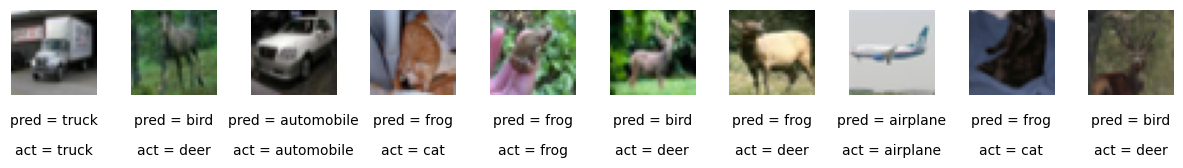

In [14]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10
       , ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10
        , ha='center', transform=ax.transAxes)
    ax.imshow(img)

Running through them...
1. A truck is a truck.
2. The deer is **not** a bird!
3. Automobile? intereesting, as a truck is an automobile...
4. A cat is **not** a frog.
5. We have a frog.
6. Another deer mistaken for a bird.
7. A deer mistaken for a frog.
8. An airplane.
9. back to #4.
10. And another deer mistaken for a bird.


However, this does represent a MLP, trained to make predictions on new data!